In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

# 데이터 로드

In [2]:
data = pd.read_csv('./data/cluster_data.csv')

In [3]:
# 종사자 제거
data.drop(['제조업종사자비율','도소매업종사자비율', '운수업종사자비율','주택','전체대비주택비율'], axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군           31 non-null     object 
 1   총인구수         31 non-null     int64  
 2   지역화폐사용액(천원)  31 non-null     float64
 3   경제활동참가율      31 non-null     float64
 4   서비스업사업체비율    31 non-null     float64
 5   제조업사업체비율     31 non-null     float64
 6   도소매업사업체비율    31 non-null     float64
 7   운수업사업체비율     31 non-null     float64
 8   농업가구비율       31 non-null     float64
 9   합계출산율        31 non-null     float64
 10  도시지역면적       31 non-null     int64  
 11  면적대비주택비율     31 non-null     float64
 12  미성년비율        31 non-null     float64
 13  청년비율         31 non-null     float64
 14  중년비율         31 non-null     float64
 15  장년비율         31 non-null     float64
 16  노년비율         31 non-null     float64
dtypes: float64(14), int64(2), object(1)
memory usage: 4.2+ KB


# PCA
## Standardization

In [5]:
x = data.drop(['시군'], axis=1)
y = data['시군'].values

In [6]:
x

,총인구수,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,도소매업사업체비율,운수업사업체비율,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
0,1194465,22696236.0,62.6,0.759848,0.052995,0.234011,0.105050,0.005607,0.890,121182030,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439
1,942724,86074070.0,62.0,0.767902,0.063562,0.249546,0.090824,0.002191,0.852,141820898,0.001772,0.172351,0.198688,0.253128,0.241703,0.134130
2,451868,9062650.0,59.4,0.758880,0.049615,0.233721,0.114696,0.005818,0.847,81598380,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722
3,567044,20391808.0,62.1,0.733692,0.086717,0.263631,0.091067,0.002539,0.980,58480054,0.002937,0.173936,0.200810,0.241278,0.258014,0.125962
4,829996,31543254.0,63.0,0.660901,0.173820,0.221111,0.093887,0.002737,0.807,53450000,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295
5,316552,6372380.0,61.8,0.710427,0.092470,0.258978,0.122433,0.004860,0.840,38506473,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789
6,513027,10543560.0,63.8,0.722968,0.105638,0.229402,0.094678,0.040472,1.102,151090527,0.001137,0.198596,0.193366,0.265432,0.224345,0.118261
7,94768,2106819.0,56.2,0.724726,0.077040,0.217266,0.107948,0.017531,0.854,33565811,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349
8,650918,27036345.0,63.4,0.635912,0.173842,0.213921,0.116399,0.006213,0.887,151472339,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521
9,1066351,28739326.0,59.7,0.734979,0.084586,0.266667,0.104599,0.013251,0.802,194127720,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944


In [7]:
# x객체에 x를 표준화한 데이터를 저장
trans_x = StandardScaler().fit_transform(x.values)

In [8]:
x_df = pd.DataFrame(trans_x, columns=x.columns)

## PCA

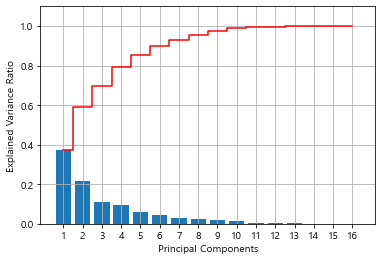

In [9]:
pca = PCA(n_components=x_df.shape[1])
pca.fit(x_df)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio)+1)
    plt.bar(x_axis, explained_variance_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

explained_variance_ratio_plot(explained_variance_ratio)

In [10]:
df_v = pd.DataFrame(np.cumsum(explained_variance_ratio[:8]), 
                    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'], 
                    columns=['Cum_V_ration'])

df_v

,Cum_V_ration
PC1,0.373937
PC2,0.590826
PC3,0.698921
PC4,0.795343
PC5,0.854956
PC6,0.900114
PC7,0.931394
PC8,0.955472


In [11]:
printcipalComponents = pca.fit_transform(x_df)

In [12]:
pca_data = pd.DataFrame(printcipalComponents[:,:8], index = y,
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [13]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
수원시,-2.532090,-1.847417,1.452873,0.820488,1.050200,-1.041108,-0.272705,-0.754997
성남시,-1.791206,-2.137039,2.415257,2.760614,0.304180,1.146010,0.967266,1.961397
의정부시,-0.109886,-2.147493,-0.297740,-0.296789,-0.177370,-0.803038,0.040520,0.041208
안양시,-0.444307,-1.745551,1.384818,-0.267460,0.896285,0.296123,-0.482763,-0.398927
부천시,-1.266259,-1.586538,3.804544,-0.682844,-0.365496,-0.258226,-1.261977,-0.636077
광명시,-0.704025,-1.708895,-0.062830,-1.405418,0.180660,-0.161261,-0.611625,-0.342133
평택시,-0.928314,0.572707,-0.541976,0.468844,1.354073,-0.321947,0.160698,-0.228507
동두천시,1.789302,-1.743635,-1.224855,-0.689528,-1.281870,-0.706900,-0.410454,0.910157
안산시,-1.539874,-0.163640,1.376974,-0.399001,-0.650385,-0.126589,1.714725,-0.201425
고양시,-1.393158,-1.988712,0.344464,1.667047,-0.834190,-0.002182,0.344837,-0.624156


# K-Means Clustering

## elbow plot

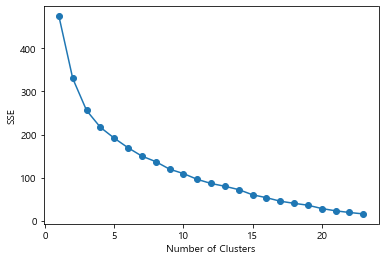

In [14]:
def elbow(x, n):
    sse = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, n), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(pca_data, 24)

## dendrogram

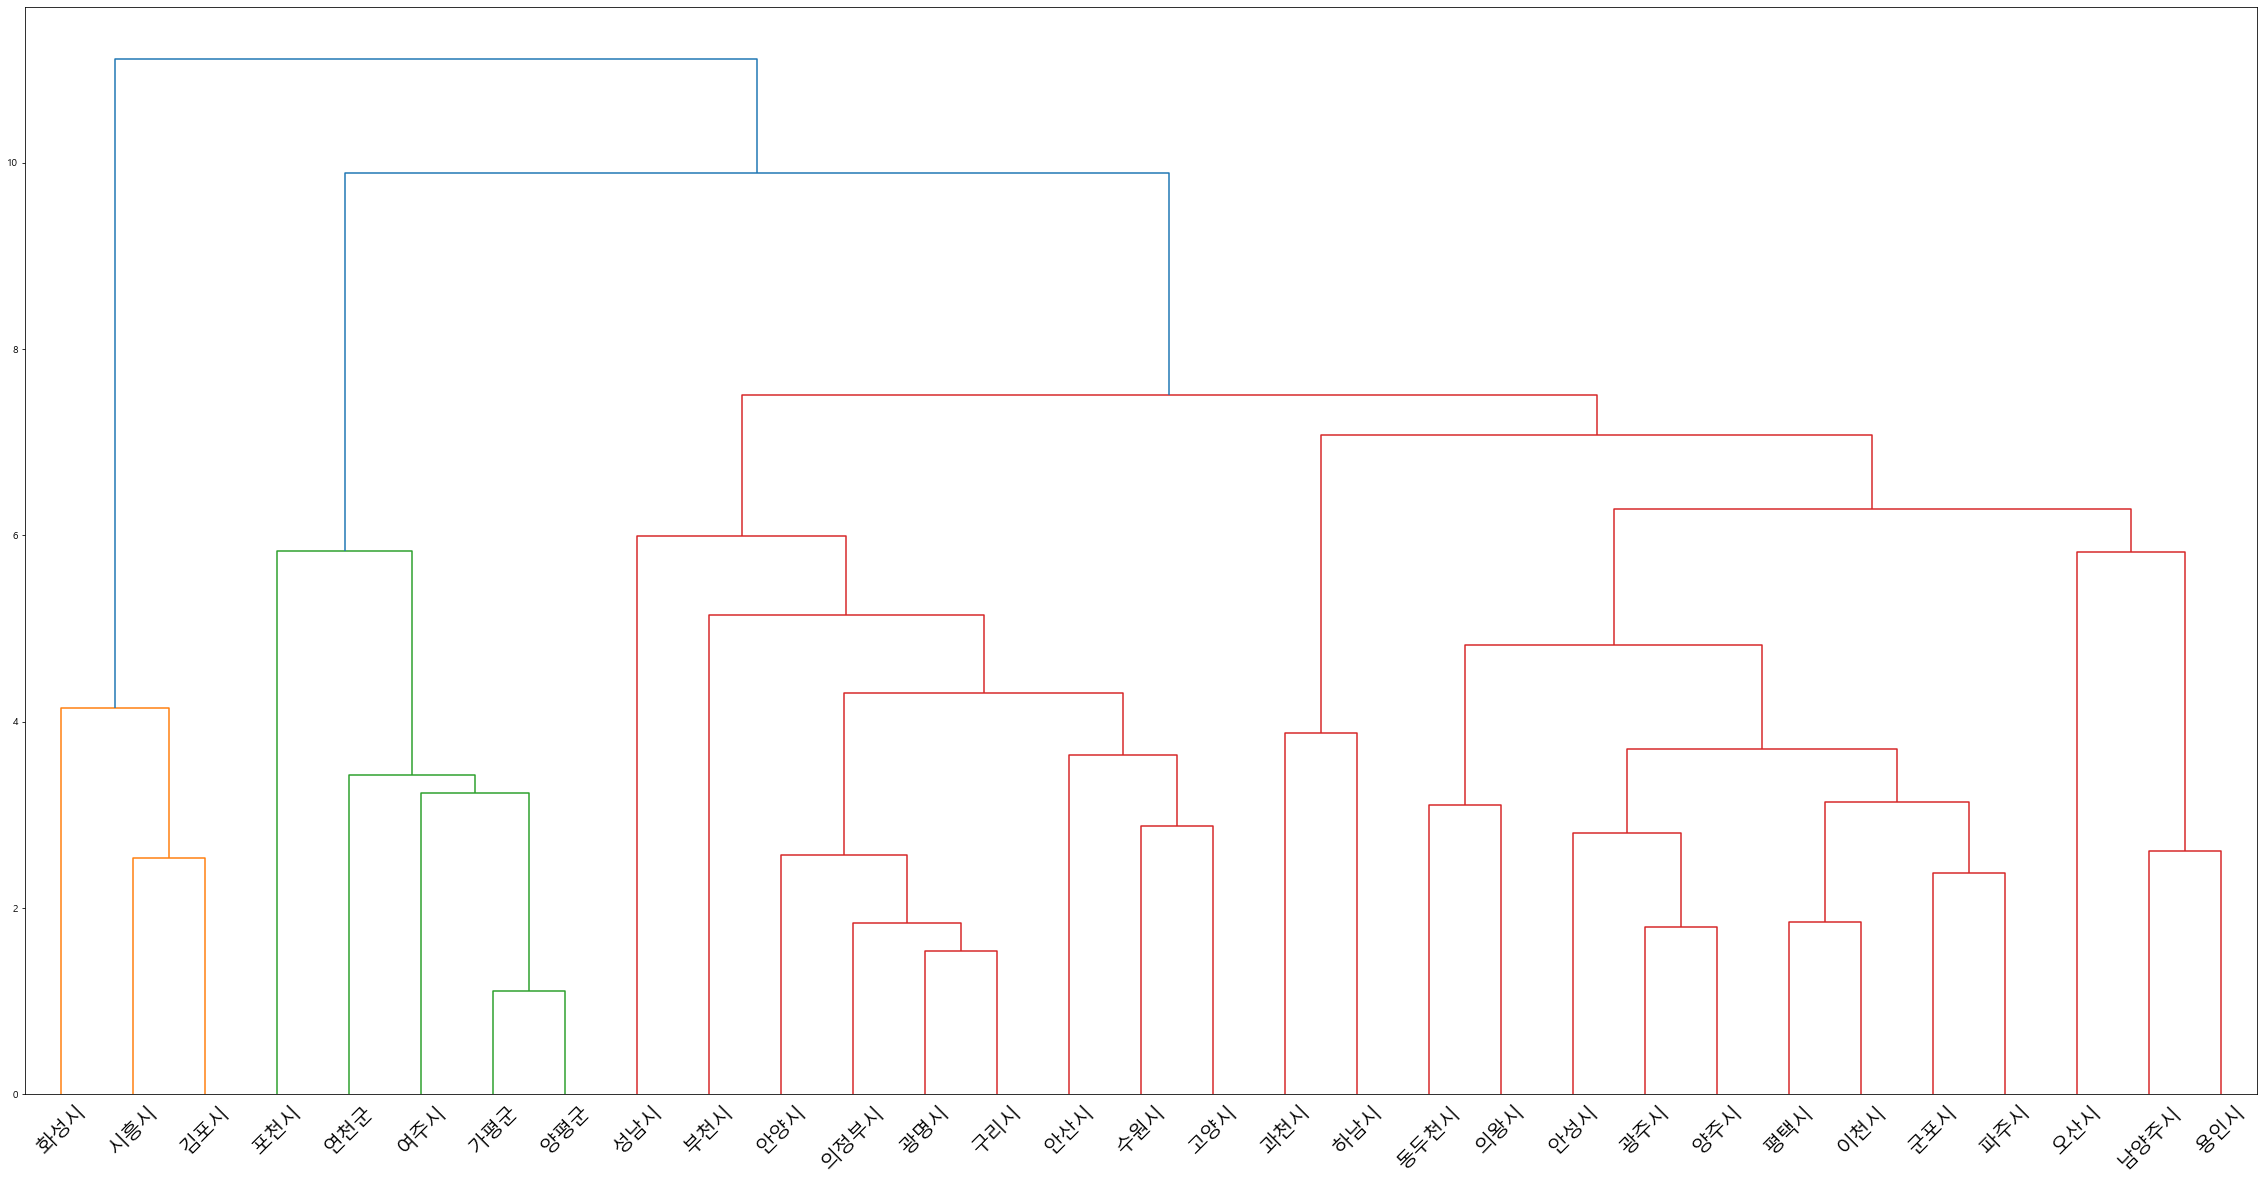

In [15]:
#link_data = pca_data.drop(['cluster_id'], axis = 1)
mergings = linkage(pca_data,method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings, labels = pca_data.index, leaf_font_size=20)
plt.show()

## K-Means

In [16]:
kmeans = KMeans(n_clusters=6).fit(pca_data)

In [17]:
pca_data['cluster_id'] = kmeans.labels_

In [18]:
data['cluster_id'] = kmeans.labels_

# result

In [19]:
data

,시군,총인구수,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,도소매업사업체비율,운수업사업체비율,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율,cluster_id
0,수원시,1194465,22696236.0,62.6,0.759848,0.052995,0.234011,0.105050,0.005607,0.890,121182030,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439,4
1,성남시,942724,86074070.0,62.0,0.767902,0.063562,0.249546,0.090824,0.002191,0.852,141820898,0.001772,0.172351,0.198688,0.253128,0.241703,0.134130,4
2,의정부시,451868,9062650.0,59.4,0.758880,0.049615,0.233721,0.114696,0.005818,0.847,81598380,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722,0
3,안양시,567044,20391808.0,62.1,0.733692,0.086717,0.263631,0.091067,0.002539,0.980,58480054,0.002937,0.173936,0.200810,0.241278,0.258014,0.125962,4
4,부천시,829996,31543254.0,63.0,0.660901,0.173820,0.221111,0.093887,0.002737,0.807,53450000,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295,4
5,광명시,316552,6372380.0,61.8,0.710427,0.092470,0.258978,0.122433,0.004860,0.840,38506473,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789,0
6,평택시,513027,10543560.0,63.8,0.722968,0.105638,0.229402,0.094678,0.040472,1.102,151090527,0.001137,0.198596,0.193366,0.265432,0.224345,0.118261,1
7,동두천시,94768,2106819.0,56.2,0.724726,0.077040,0.217266,0.107948,0.017531,0.854,33565811,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349,0
8,안산시,650918,27036345.0,63.4,0.635912,0.173842,0.213921,0.116399,0.006213,0.887,151472339,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521,1
9,고양시,1066351,28739326.0,59.7,0.734979,0.084586,0.266667,0.104599,0.013251,0.802,194127720,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944,4


## cluster별 시/군

In [20]:
data_dict = {}
for i in range(6):
    dict_list = []
    for j in data.index:
        if data['cluster_id'][j] == i:
            dict_list.append(data['시군'][j])
    data_dict[i] = dict_list    

gg_cluster = pd.DataFrame.from_dict(data_dict, orient = 'index').fillna(' ')
gg_cluster

,0,1,2,3,4,5,6,7,8,9,10
0,의정부시,광명시,동두천시,과천시,구리시,의왕시,하남시,,,,
1,평택시,안산시,남양주시,오산시,군포시,용인시,파주시,이천시,안성시,광주시,양주시
2,여주시,연천군,가평군,양평군,,,,,,,
3,시흥시,김포시,화성시,,,,,,,,
4,수원시,성남시,안양시,부천시,고양시,,,,,,
5,포천시,,,,,,,,,,


## feature 특징

In [21]:
data_mean = data.set_index('시군').groupby('cluster_id').mean()

In [22]:
data_mean

,총인구수,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,도소매업사업체비율,운수업사업체비율,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
cluster_id,,,,,,,,,,,,,,,,
0,222050.000000,7.028460e+06,59.514286,0.731320,0.073816,0.271975,0.113354,0.010129,0.870286,5.283583e+07,0.001313,0.182310,0.181676,0.246535,0.249507,0.139972
1,443260.181818,1.154739e+07,62.390909,0.658298,0.157145,0.217205,0.109174,0.035864,1.003182,1.504497e+08,0.001133,0.198702,0.181935,0.261603,0.231501,0.126259
2,83549.000000,4.009234e+06,62.650000,0.739642,0.082059,0.203587,0.061538,0.147750,1.122750,4.740666e+07,0.000741,0.146114,0.139651,0.192205,0.284232,0.237797
3,575433.000000,2.734086e+07,65.933333,0.562096,0.298375,0.204585,0.083464,0.025537,1.098667,1.849257e+08,0.001105,0.224604,0.181255,0.290685,0.207476,0.095980
4,920116.000000,3.788894e+07,61.880000,0.731464,0.092336,0.246993,0.097086,0.005265,0.866200,1.138121e+08,0.002804,0.177325,0.201082,0.250381,0.248258,0.122954
5,148379.000000,2.377732e+06,65.700000,0.538570,0.324684,0.195972,0.073449,0.094998,0.889000,3.901304e+07,0.001271,0.154516,0.162418,0.204560,0.297137,0.181368
